In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import tiktoken

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.utils.class_weight import compute_sample_weight


In [8]:
wikipedia = pd.read_csv('../../dataset.csv', index_col=0)

wikipedia

,id,url,title,text,category
416,26941,https://en.wikipedia.org/wiki/Spike%20Lee,Spike Lee,"Shelton Jackson ""Spike"" Lee (born March 20, 19...",actors
697,43337,https://en.wikipedia.org/wiki/Katharine%20Hepburn,Katharine Hepburn,"Katharine Houghton Hepburn (May 12, 1907 – Jun...",actors
1168,78127,https://en.wikipedia.org/wiki/James%20Doohan,James Doohan,"James Montgomery Doohan (; March 3, 1920 – Jul...",actors
1317,89695,https://en.wikipedia.org/wiki/William%20Christ...,William Christopher,"William Christopher (October 20, 1932 Decembe...",actors
1442,96406,https://en.wikipedia.org/wiki/Richard%20Greene,Richard Greene,Richard Marius Joseph Greene (25 August 1918 –...,actors
...,...,...,...,...,...
198385,68565885,https://en.wikipedia.org/wiki/1992%20Nigerian%...,1992 Nigerian Senate elections in Delta State,The 1992 Nigerian Senate election in Delta Sta...,events
199111,68862408,https://en.wikipedia.org/wiki/2022%20Valenzuel...,2022 Valenzuela local elections,Local elections will be held in Valenzuela on ...,events
199302,68973980,https://en.wikipedia.org/wiki/Sara%20Bay%20Cla...,Sara Bay Classic,The Sara Bay Classic was a tournament on the S...,events
200401,69486421,https://en.wikipedia.org/wiki/List%20of%20eart...,List of earthquakes in Malaysia,This is a list of earthquakes in Malaysia:\n\n...,events


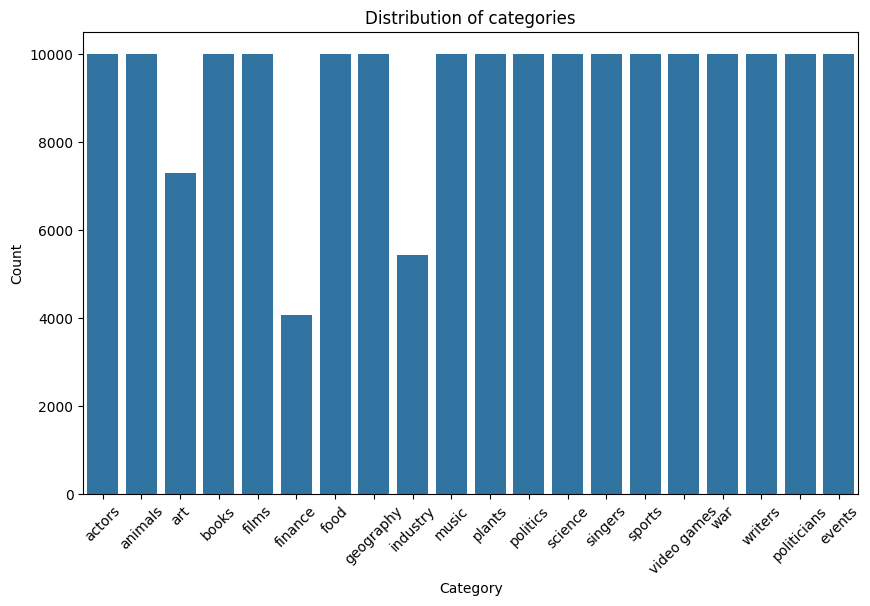

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=wikipedia)

plt.title('Distribution of categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

In [65]:
wiki = wikipedia.sample(frac=1)

wiki_X = wiki['text'][:1000]
wiki_y = wiki['category'][:1000]

X_train, X_test, y_train, y_test = train_test_split(wiki_X, wiki_y, test_size=0.2, random_state=42)
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

In [66]:
model = make_pipeline(CountVectorizer(ngram_range = (1,1)), MultinomialNB())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Features dimension: {len(X_train), len(model[0].vocabulary_)}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Features dimension: (800, 42481)
Classification Report:
               precision    recall  f1-score   support

      actors       0.71      0.71      0.71        14
     animals       0.70      1.00      0.82         7
         art       0.62      0.71      0.67         7
       books       1.00      0.09      0.17        11
      events       1.00      0.17      0.29         6
       films       0.65      1.00      0.79        11
     finance       0.00      0.00      0.00         2
        food       1.00      0.29      0.44         7
   geography       0.31      0.90      0.46        10
    industry       0.50      0.08      0.13        13
       music       0.86      1.00      0.92        12
      plants       1.00      0.50      0.67        16
 politicians       0.86      0.50      0.63        12
    politics       0.32      0.78      0.45         9
     science       0.88      0.78      0.82         9
     singers       0.46      1.00      0.63         6
      sports       0.82 

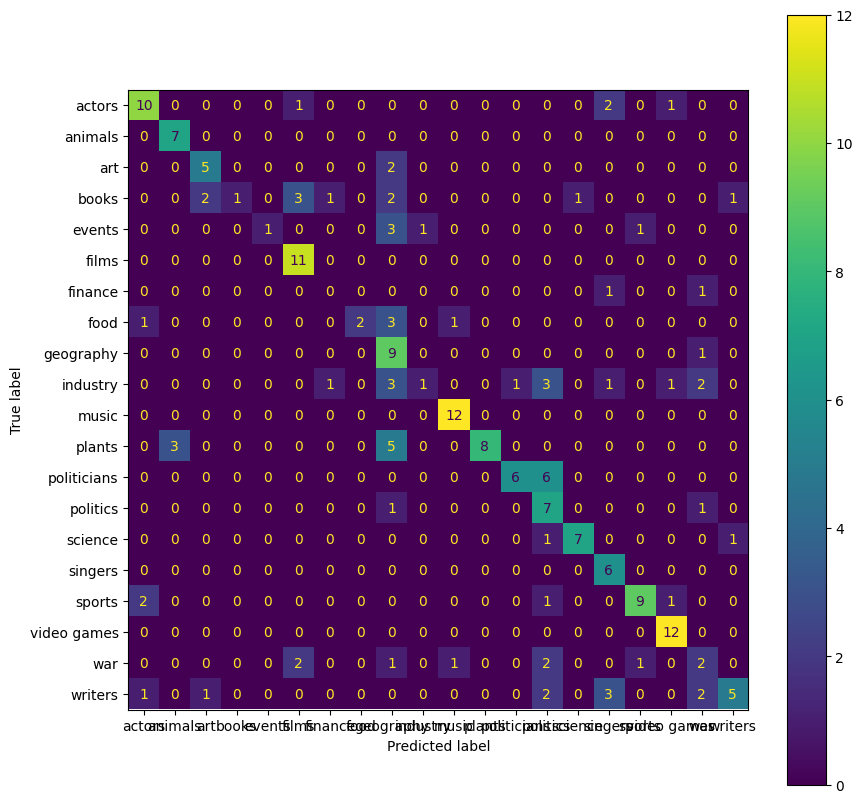

In [67]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.show()

In [68]:
test_string = X_test.iloc[20][len(X_test.iloc[20])//2:]

In [69]:
print("With text in half:", model.predict([test_string]))
print("With full text:", model.predict([X_test.iloc[20]]))

With text in half: ['sports']
With full text: ['sports']


In [70]:
X_test.iloc[20]

'The 1933 CCNY Lavender football team was an American football team that represented the City College of New York (CCNY) as an independent during the 1933 college football season. In their tenth season under Harold J. Parker, the Lavender team compiled a 1–5–1 record.\n\nSchedule\n\nReferences\n\nCCNY\nCCNY Beavers football seasons\nCCNY Lavender football'

In [71]:
y_test.iloc[20]

'sports'

In [72]:
from collections import Counter

count_c = Counter(y_train)

priors = {k:v/len(y_train) for k, v in count_c.items()}
print(priors)

train_strings = " ".join(X_train)
train_tokens = word_tokenize(train_strings)
vocabulary = set(train_tokens)
V = len(vocabulary)
classes = set(y_train)

{'singers': 0.05, 'events': 0.05625, 'writers': 0.04125, 'video games': 0.05375, 'music': 0.07375, 'plants': 0.0475, 'food': 0.0625, 'geography': 0.04, 'war': 0.06875, 'films': 0.0675, 'actors': 0.055, 'art': 0.04, 'industry': 0.03125, 'books': 0.04125, 'animals': 0.05625, 'politics': 0.05, 'sports': 0.04625, 'politicians': 0.06, 'science': 0.0425, 'finance': 0.01625}


In [73]:
train_df = pd.DataFrame(zip(X_train, y_train), columns = ["text", "category"])
train_df.head()

,text,category
0,Muthoni Drummer Queen or Muthoni Ndonga is a K...,singers
1,The 2006 Mecklenburg-Vorpommern state election...,events
2,"Abundius (also Abondius, Abundias, or Abbondio...",writers
3,is a role-playing first-person shooter video ...,video games
4,"""The Last Time"" is the first single from Agnet...",music


In [76]:
mega_dict = dict()
prob_dict = dict()
k = 1

for c in classes:
    class_df = train_df.query(f"category == '{c}'")
    mega_document = class_df["text"]
    mega_strings = " ".join(mega_document)
    mega_tokens = word_tokenize(mega_strings)
    mega_count = Counter(mega_tokens)
    mega_dict[c] = mega_count
    prob_dict[c] = dict()


    for token in vocabulary:
        prob_dict[c][token] = (mega_dict[c][token] + k ) / (len(mega_tokens) + V)

print(mega_dict["sports"]["i"])
print(prob_dict["sports"]["i"])

2
3.952256738597739e-05


In [82]:
import math

test_tokens = word_tokenize("is an American")

pred_dict = dict()

for c in classes:
    sum = math.log2(priors[c])
    for token in test_tokens:
        #print(prob_dict[c][token])
        sum += math.log2(prob_dict[c][token])
    sum = math.pow(2, sum)
    pred_dict[c] = sum
print(pred_dict)
print(max(pred_dict, key=pred_dict.get))

{'actors': 1.3995291741233272e-10, 'video games': 5.431411720004773e-11, 'events': 4.7314916581128376e-11, 'war': 8.795032172325999e-11, 'animals': 3.871791420315192e-11, 'singers': 3.508965707258086e-11, 'geography': 7.129330924250361e-11, 'writers': 8.432211967937545e-11, 'science': 1.756555092656678e-10, 'art': 1.6797247050640805e-11, 'books': 4.308773228180941e-11, 'sports': 1.576109042204213e-11, 'politics': 6.300836794519583e-11, 'finance': 4.068791368753977e-12, 'industry': 5.5713117779532887e-11, 'music': 6.389684967614741e-11, 'plants': 6.700777839672826e-12, 'films': 9.465666942578666e-10, 'politicians': 1.6586954625598132e-11, 'food': 2.493251965068372e-11}
films


In [84]:
import math

test_tokens = [word_tokenize(text) for text in X_test]

pred_dict = dict()
preds = list()

for report_tokens in test_tokens:
    for c in classes:
        sum = math.log2(priors[c])
        for token in report_tokens:
            if token in prob_dict[c]: # remove unknown tokens
                sum += math.log2(prob_dict[c][token])
        sum = math.pow(2, sum)
        pred_dict[c] = sum
    preds.append(max(pred_dict, key=pred_dict.get))

In [85]:
from sklearn.metrics import classification_report

print(classification_report(preds, list(y_test)))

              precision    recall  f1-score   support

      actors       1.00      0.09      0.16       163
     animals       0.71      0.83      0.77         6
         art       0.14      0.50      0.22         2
       books       0.00      0.00      0.00         0
      events       0.00      0.00      0.00         0
       films       0.09      1.00      0.17         1
     finance       0.00      0.00      0.00         0
        food       0.14      1.00      0.25         1
   geography       0.10      0.17      0.12         6
    industry       0.00      0.00      0.00         0
       music       0.17      1.00      0.29         2
      plants       0.19      1.00      0.32         3
 politicians       0.25      1.00      0.40         3
    politics       0.22      0.50      0.31         4
     science       0.00      0.00      0.00         0
     singers       0.00      0.00      0.00         0
      sports       0.38      0.83      0.53         6
 video games       0.08    

C:\Users\iveme\Documents\cours NLP\PROJECT\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\iveme\Documents\cours NLP\PROJECT\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\iveme\Documents\cours NLP\PROJECT\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu